In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

# Part 1: The Invariant Mass Distribution

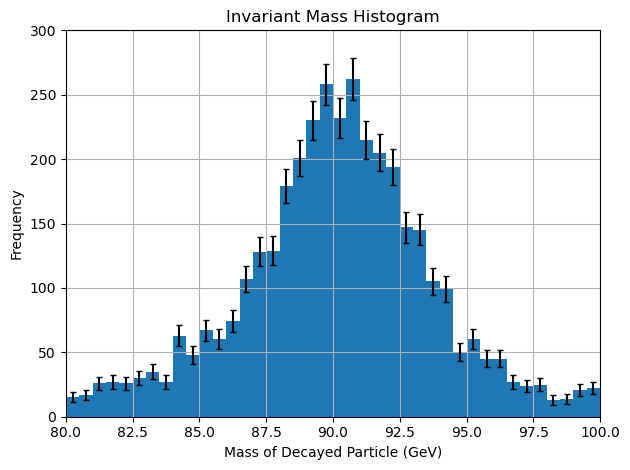

In [2]:
# Question 1

data = np.loadtxt("atlas_z_to_ll.csv", delimiter=',', skiprows=1)
pT1 = data[:,0]
pT2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

# Question 2

def px(pT, phi):
    return pT*np.cos(phi)

def py(pT, phi):
    return pT*np.sin(phi)

def pz(pT, eta):
    return pT*np.sinh(eta)

def M(E, px, py, pz):
    return np.sqrt(np.abs(E**2 - (px**2 + py**2 + pz**2)))

pair_masses = np.zeros(len(pT1))
for i in range(len(pT1)):
    px_total = px(pT1[i], phi1[i]) + px(pT2[i], phi2[i])
    py_total = py(pT1[i], phi1[i]) + py(pT2[i], phi2[i])
    pz_total = pz(pT1[i], eta1[i]) + pz(pT2[i], eta2[i])
    E_total = E1[i] + E2[i]
    pair_masses[i] = M(E_total, px_total, py_total, pz_total)

# Question 3

fig,ax = plt.subplots()
counts, bins, patches = ax.hist(pair_masses, bins=np.linspace(80, 100, 41))
sigmas = np.sqrt(counts)
bin_centers = (bins[:-1] + bins[1:])/2
ax.errorbar(bin_centers, counts, yerr=sigmas, fmt='none', capsize=2, ecolor='black')

ax.set_title("Invariant Mass Histogram")
ax.set_xlabel(r'Mass of Decayed Particle (GeV)')
ax.set_xlim(80,100)
ax.set_ylabel("Frequency")
ax.set_ylim(0,300)
plt.grid()
plt.tight_layout()

# Part 2: Breit-Wigner Fit

        Within the fitting range, chisq = 9.985097164263747
Within the fitting range, reduced chisq = 0.9985097164263748
      Within the fitting range, p-value = 0.4418017385627254 

The best fit for m0 is 90.34080586024453 +/- 0.0935148271043187


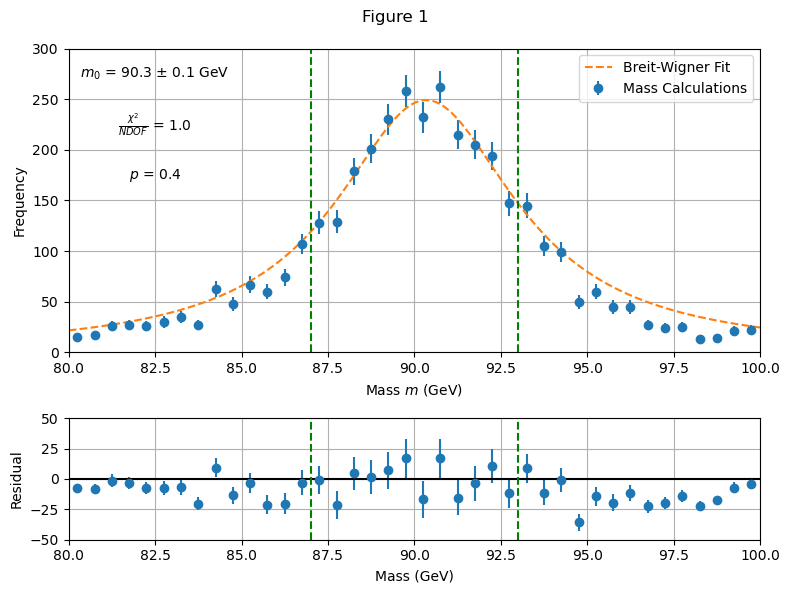

In [3]:
# Question 1

def fitted_D(m, m0, Gamma):
    return 2500 * (1/np.pi) * (Gamma/2) / ((m-m0)**2 + (Gamma/2)**2)

# Question 2

mask = (bin_centers>87) & (bin_centers<93)
bin_centers_m = bin_centers[mask]
counts_m = counts[mask]
sigmas_m = sigmas[mask]
params, covar = curve_fit(f=fitted_D, xdata=bin_centers_m, ydata=counts_m, sigma=sigmas_m, absolute_sigma=True)

# Question 3

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw={'height_ratios':[5,2]})
fig.suptitle("Figure 1")

ax1.errorbar(bin_centers, counts, yerr=sigmas, fmt='o', label='Mass Calculations')
xdummy = np.linspace(80, 100, 1001)
ydummy = fitted_D(xdummy, *params)
ax1.plot(xdummy, ydummy, '--', label='Breit-Wigner Fit')

ax1.set_xlim(80,100)
ax1.set_xlabel(r'Mass $m$ (GeV)')
ax1.set_ylim(0,300)
ax1.set_ylabel("Frequency")
ax1.vlines(87, 0, 300, linestyles='dashed', color='green')
ax1.vlines(93, 0, 300, linestyles='dashed', color='green')
ax1.grid()
ax1.legend()

ytheory = fitted_D(bin_centers, *params)
residuals = counts - ytheory
ax2.errorbar(bin_centers, residuals, yerr=sigmas, fmt='o')

ax2.set_xlim(80,100)
ax2.set_xlabel(r'Mass (GeV)')
ax2.hlines(0, 80, 100, color='black')
ax2.set_ylim(-50,50)
ax2.set_ylabel("Residual")
ax2.vlines(87, -50, 50, linestyles='dashed', color='green')
ax2.vlines(93, -50, 50, linestyles='dashed', color='green')
ax2.grid()

# Question 4

ytheory_m = ytheory[mask]
chisq = np.sum((counts_m - ytheory_m)**2 / sigmas_m**2)
print(f"        Within the fitting range, chisq = {chisq}")

dof = len(counts_m) - 2
reduced_chisq = chisq/dof
print(f"Within the fitting range, reduced chisq = {reduced_chisq}")

pvalue = st.chi2.sf(chisq, dof)
print(f"      Within the fitting range, p-value = {pvalue} \n")

# Question 5

m0_best = params[0]
m0_err = np.sqrt(np.diag(covar))[0]
print(f"The best fit for m0 is {m0_best} +/- {m0_err}")

# Question 6

ax1.text(82.5, 275, f"$m_0$ = {m0_best:.1f} \u00B1 {m0_err:.1f} GeV", ha='center', va='center')
ax1.text(82.5, 225, r"$\frac{\chi^2}{NDOF}$ ="+f" {reduced_chisq:.1f}", ha='center', va='center')
ax1.text(82.5, 175, f"$p$ = {pvalue:.1f}", ha='center', va='center')

plt.tight_layout()
plt.savefig("Lab 3 Figure 1")

# Part 3: 2D Parameter Contours

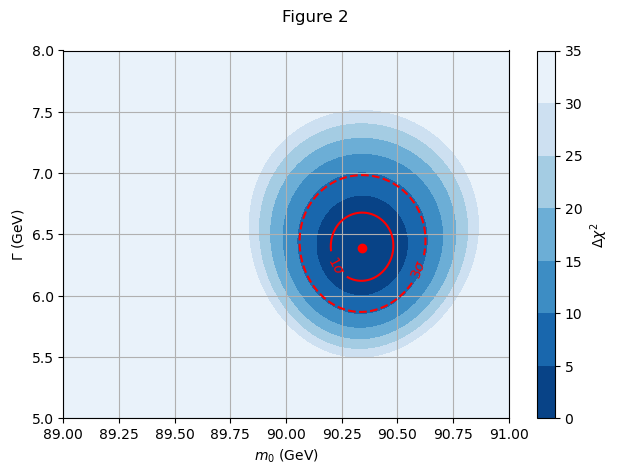

In [4]:
# Question 1

n_bins = 300
m0_vals = np.linspace(89, 91, n_bins)
Gamma_vals = np.linspace(5, 8, n_bins)

chisq_map = np.zeros((n_bins, n_bins))
for i in range(n_bins):
    for j in range(n_bins):
        model = fitted_D(bin_centers_m, m0_vals[i], Gamma_vals[j])
        chisq = np.sum((counts_m - model)**2 / sigmas_m**2)
        chisq_map[j,i] = chisq

# Question 2

chi_min = np.min(chisq_map)
chi_map = np.clip(chisq_map, chi_min, chi_min+35)
delta_chi_map = chi_map - chi_min

X,Y = np.meshgrid(m0_vals, Gamma_vals)
fig,ax = plt.subplots()
fig.suptitle("Figure 2")
cs = ax.contourf(X, Y, delta_chi_map, cmap="Blues_r")
cbar = fig.colorbar(cs, ax=ax)

ax.set_xlabel(r'$m_0$ (GeV)')
ax.set_ylabel(r'$\Gamma$ (GeV)')
cbar.set_label(r'$\Delta \chi^2$')

levels = [2.30, 9.21]
cs2 = ax.contour(X, Y, delta_chi_map, levels=levels, colors=["red", "red"], linestyles=["solid", "dashed"])

fmt = {}
strs = [r'1$\sigma$', r'3$\sigma$']
for l, s in zip(cs2.levels, strs):
    fmt[l] = s
ax.clabel(cs2, cs2.levels, inline=True, fmt=fmt)

# Question 4
ax.plot(m0_best, params[1], 'ro')
ax.grid()

plt.tight_layout()
plt.savefig("Lab 3 Figure 2")